In [102]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(123)

# 1. Create a DataFrame

In [96]:
ID = []
for i in range(1, 801):
    id_number = f"ID{i:03d}"
    ID.append(id_number)
    
Group = ['A'] * 266 + ['B'] * 267 + ['C'] * 267
random.shuffle(Group)

Feature_1 = np.random.normal(2500, 150, 800)

Feature_2 = np.random.normal(400, 15, 800)

df = pd.DataFrame({'ID': ID, 'Group': Group, 'Feature_1': Feature_1, 'Feature_2': Feature_2})

In [97]:
Feature_3 = []

for i in range(0, 800):
    if df.iloc[i, 1] == 'A':
        value = 3 * df.iloc[i, 2] - 5 * df.iloc[i, 3]
        Feature_3.append(value)
    elif df.iloc[i, 1] == 'B':
        value = 2 * df.iloc[i, 2]
        Feature_3.append(value)
    elif df.iloc[i, 1] == 'C':
        value = -1 * df.iloc[i, 2] + df.iloc[i,3]
        Feature_3.append(value)

df['Feature_3'] = Feature_3

df.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID001,C,2508.787781,388.356548,-2120.431234
1,ID002,B,2525.459948,382.820397,5050.919896
2,ID003,B,2667.371137,393.715154,5334.742274
3,ID004,A,2575.543964,408.434601,5684.458885
4,ID005,C,2536.025082,412.159649,-2123.865433


# 2. Questions

## a. Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?

I based my creation of `Feature_1` on the empirical rule. Since the variable is normally distributed, about 68% of the data lies within one standard deviation, about 95% of the data lies within two standard deviations, and about 99.7% of the data falls within three standard deviations. 68% is close to the given fact that 66% of the data lays between 2200 and 2800. We extrapolated that the standard deviation is therefore about 150. This means that values greater than 2950 are more than three standard deviations from the mean. 2950 is close in value to 3000. Therefore, we expect that about 0.15% ($\frac{100-99.7}{2} = 0.15$), or about 1 sample, will have a `Feature_1` value greater than 3000.

## b. How many samples did you actually find where Feature_1 is greater than 3000?

In [98]:
samples_above_3000 = np.sum(Feature_1 > 3000)
print(samples_above_3000)

1


Our prediction was accurate - we actually found that 1 sample had `Feature_1` greater than 3000.

## c.  Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group.

In [100]:
grouped = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])
print(grouped)

              mean         std
Group                         
A      5534.878754  476.880674
B      5018.293209  295.523907
C     -2093.578825  148.826878


# 3. Make a scatterplot of Feature_3 vs Feature_1.

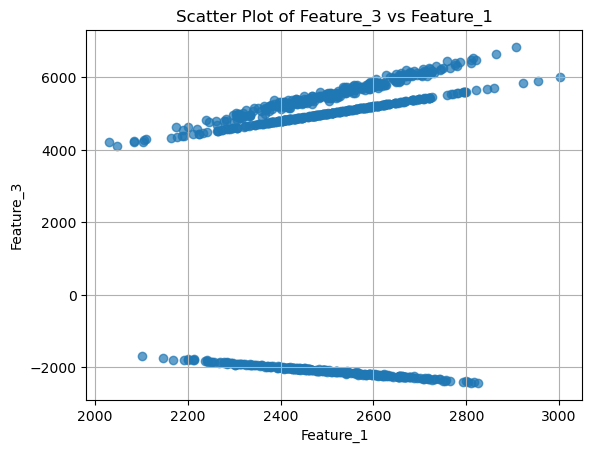

In [104]:
plt.scatter(df['Feature_1'], df['Feature_3'], alpha=0.7)
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatter Plot of Feature_3 vs Feature_1')
plt.grid(True)
plt.show()

# 4. Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [105]:
df.to_csv('fake_data.csv', index=False)